<a href="https://colab.research.google.com/github/zaki-m-khan/CSE337-ReinforcementLearning/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [2]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -199
Episode 2: total reward = -1090
Episode 3: total reward = -1189
Episode 4: total reward = -1486
Episode 5: total reward = -1090


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [9]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap



# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

'''
Start with Q-table = zeros.
For each episode: reset env, pick first action with E-greedy.
Loop until done:
   - Take action -> get next state + reward.
   - Pick next action with E-greedy
   - Update Q[s,a] with SARSA Eq. 6.9
   - Move to next state/action.
Decay E after each episode.

'''

# e-greedy: sometimes explore, otherwise take the best action we know
def choose_action(state, eps):
    if np.random.rand() < eps:                 # explore
        return np.random.randint(n_actions)
    return int(np.argmax(Q[state]))            # exploit

# simple hyperparams
alpha = learning_rate          # step size
gamma = discount_factor        # discount
epsilon = 0.10                 # 10% exploration (make this larger if it gets stuck)
eps_min = 0.01                 # never stop exploring completely
eps_decay = 0.995              # get a bit greedier each episode

for episode in range(n_episodes):
    state, _ = env.reset()
    action = choose_action(state, epsilon)     # first action (on-policy)
    total_reward = 0

    for step in range(max_steps):
        next_state, reward, terminated, truncated, step = env.step(action)
        done = terminated or truncated
        total_reward += reward

        # on-policy target: use the action we will actually take next
        if not done:
            next_action = choose_action(next_state, epsilon)
            target = reward + gamma * Q[next_state, next_action]
        else:
            next_action = None
            target = reward

        # SARSA from textbook (eq. 6.9)
        Q[state, action] += alpha * (target - Q[state, action])

        # move on
        state = next_state
        if next_action is not None:
            action = next_action
        if done:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()


Episode 1: total reward = -99
Episode 2: total reward = -793
Episode 3: total reward = -298
Episode 4: total reward = -199
Episode 5: total reward = -199
Episode 6: total reward = -298
Episode 7: total reward = -199
Episode 8: total reward = -298
Episode 9: total reward = -298
Episode 10: total reward = -100
Episode 11: total reward = -100
Episode 12: total reward = -199
Episode 13: total reward = -199
Episode 14: total reward = -100
Episode 15: total reward = -199
Episode 16: total reward = -60
Episode 17: total reward = -97
Episode 18: total reward = -199
Episode 19: total reward = -86
Episode 20: total reward = -97
Episode 21: total reward = -100
Episode 22: total reward = -81
Episode 23: total reward = -100
Episode 24: total reward = -46
Episode 25: total reward = -199
Episode 26: total reward = -100
Episode 27: total reward = -199
Episode 28: total reward = -38
Episode 29: total reward = -100
Episode 30: total reward = -97
Episode 31: total reward = -199
Episode 32: total reward =

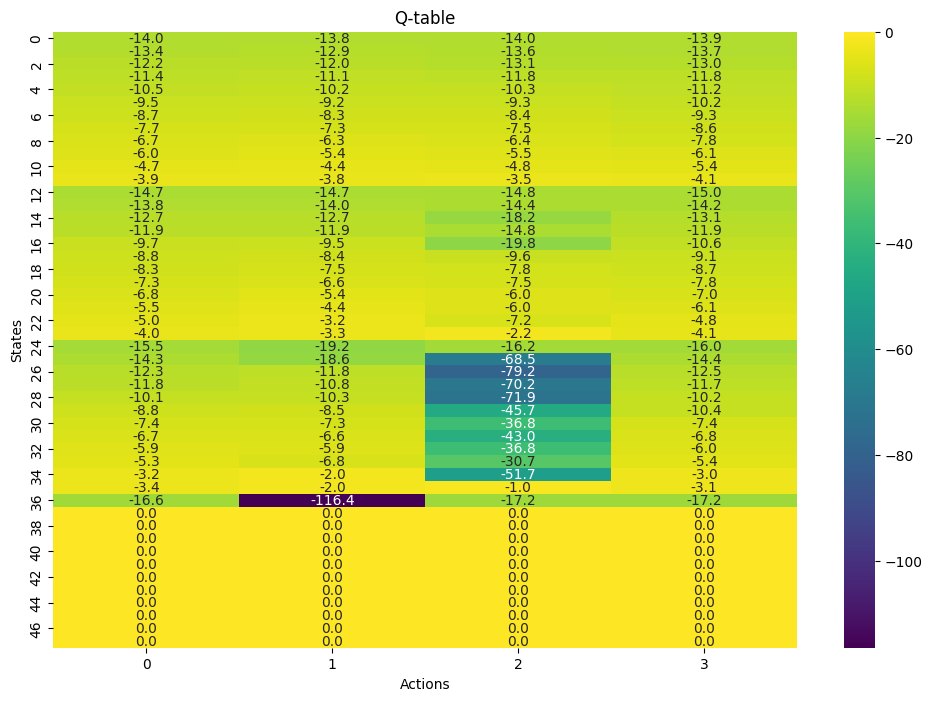

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

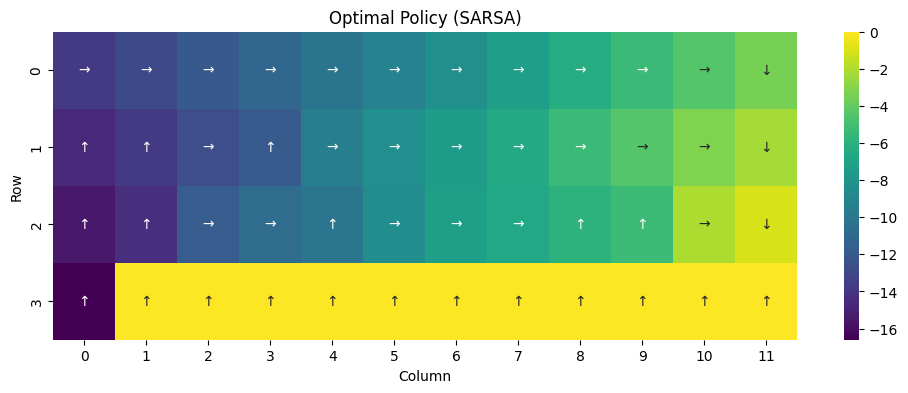

In [11]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

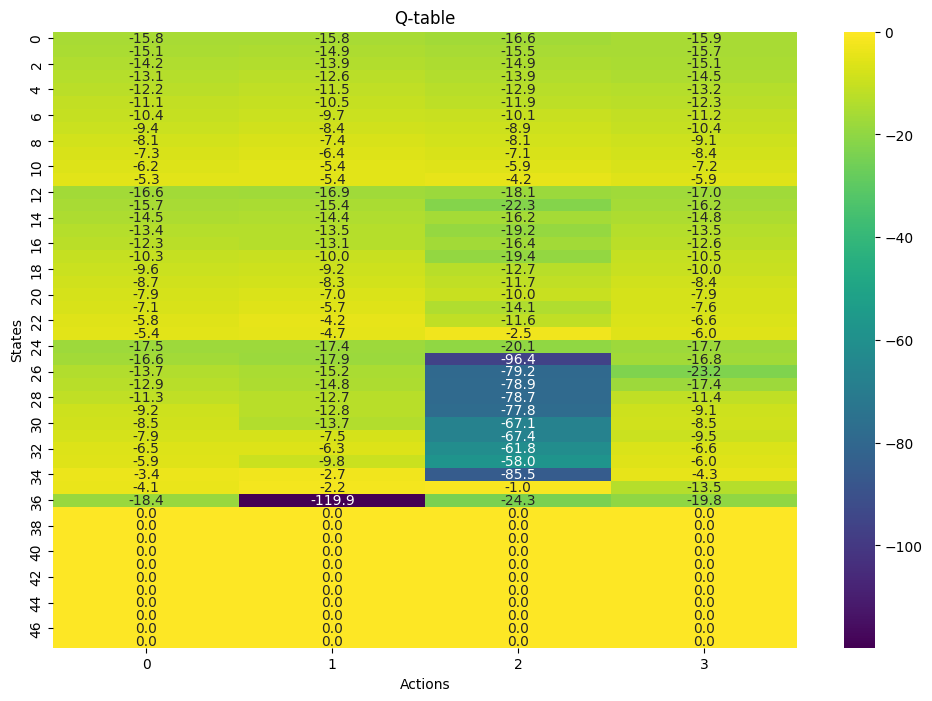

In [ ]:
plot_Q(Q)

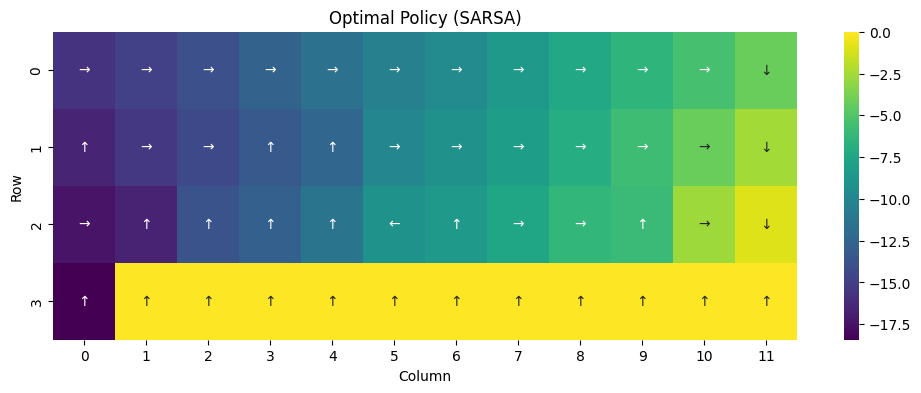

In [ ]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
